<a href="https://colab.research.google.com/github/arshhh04/python_projects/blob/main/cat%26dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:31<00:00, 36.6MB/s]
100% 1.06G/1.06G [00:31<00:00, 35.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
 #generators
train_ds=keras.utils.image_dataset_from_directory (
     directory='/content/dogs_vs_cats/train',
     labels='inferred',
     label_mode='int',#0 and 1 to the images
     batch_size=32,
     image_size=(256,256)

 )
test_ds=keras.utils.image_dataset_from_directory (
     directory='/content/dogs_vs_cats/test',
     labels='inferred',
     label_mode='int',#0 and 1 to the images
     batch_size=32,
     image_size=(256,256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#doing this it converted image to numpy array having values from 0,255 but we need to convert iit into 0,1
#normalization
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
#cnn
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 0.8666 - accuracy: 0.6144 - val_loss: 131.6746 - val_accuracy: 0.5048
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5552 - accuracy: 0.7135 - val_loss: 1079.0255 - val_accuracy: 0.5004
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4685 - accuracy: 0.7761 - val_loss: 596.7735 - val_accuracy: 0.5022
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3905 - accuracy: 0.8192 - val_loss: 1013.0277 - val_accuracy: 0.5022
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3013 - accuracy: 0.8717 - val_loss: 271.6802 - val_accuracy: 0.6378
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2129 - accuracy: 0.9122 - val_loss: 350.6876 - val_accuracy: 0.5776
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1606 - accuracy: 0.9374 - val_loss: 4

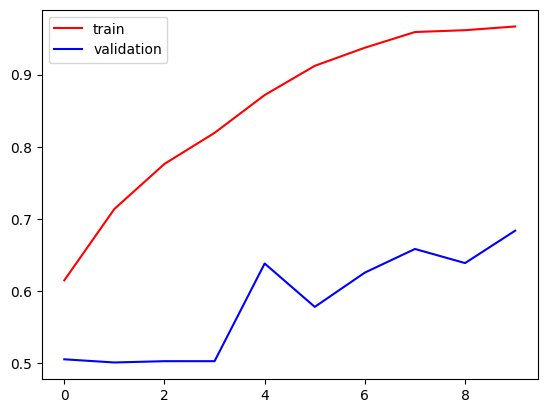

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

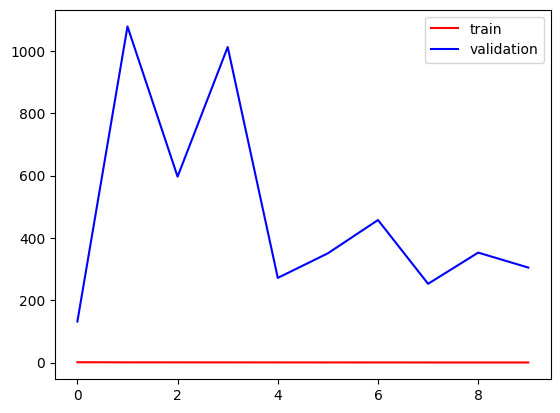

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

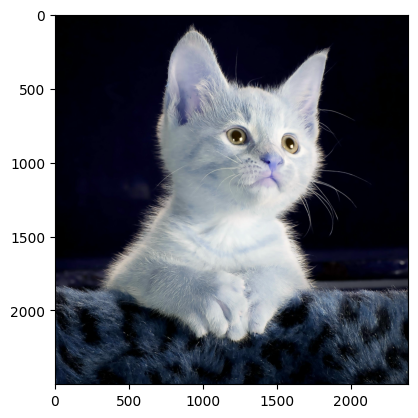

In [ ]:
import cv2
test_img = cv2.imread('/content/train/cat.jpeg')
plt.imshow(test_img)


In [ ]:
test_img.shape

(2500, 2392, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)
#0 means a cat and 1 means dog

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

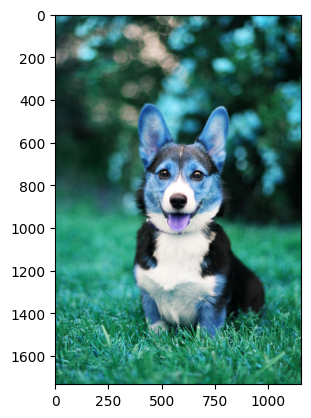

In [ ]:
test_img = cv2.imread('/content/train/dog.jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)